In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns = california.feature_names)

In [6]:
data['MedHouseVal'] = california.target

In [8]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

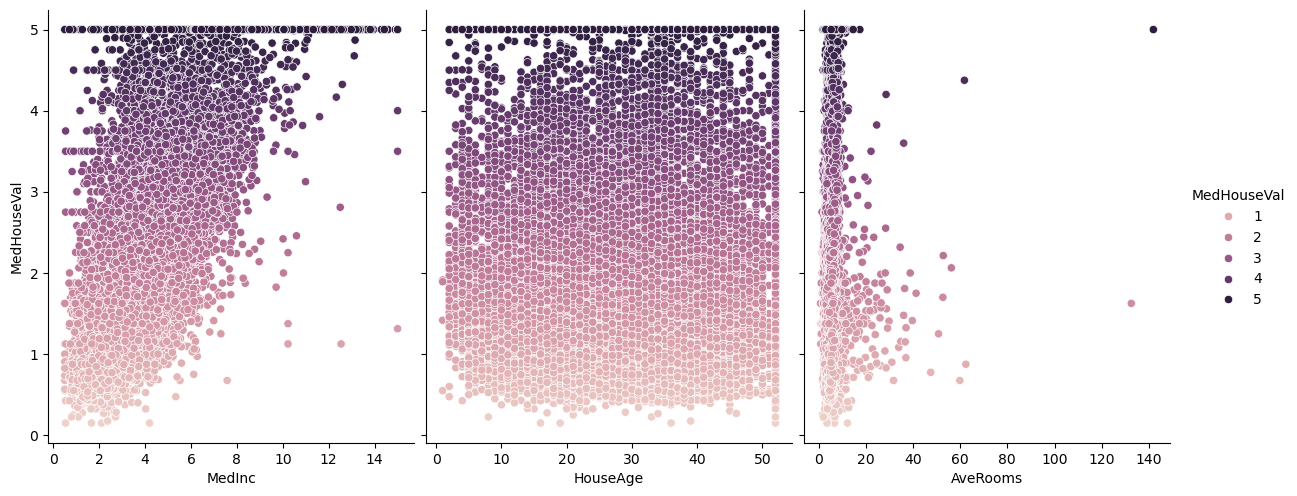

In [66]:
# Pairplot
sns.pairplot(data, x_vars = ['MedInc','HouseAge','AveRooms'], y_vars = 'MedHouseVal', height = 5, aspect = 0.8, hue = 'MedHouseVal' )
plt.show()

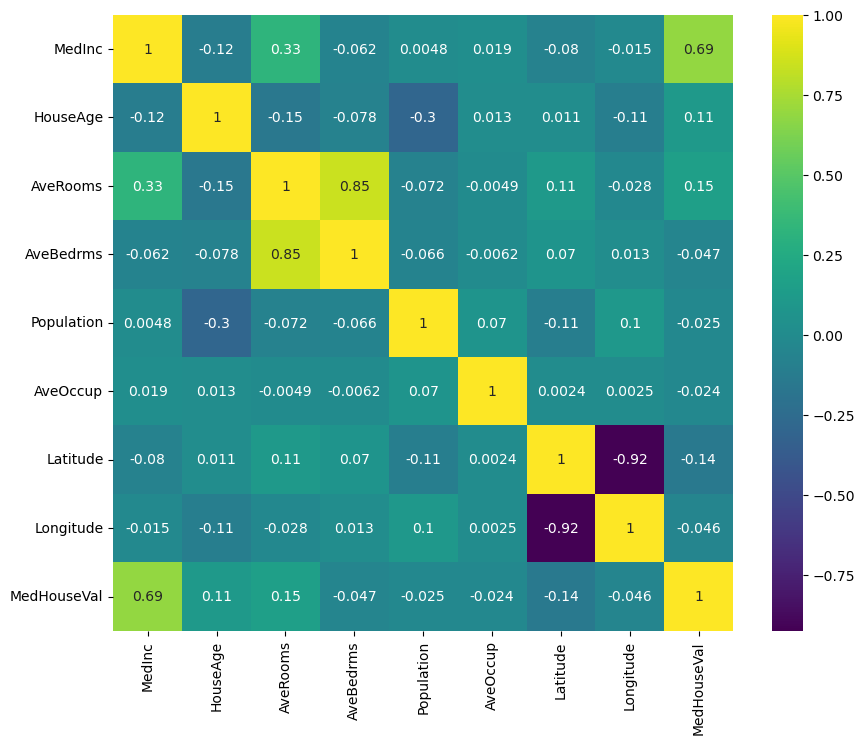

In [76]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')
plt.show()

# LINEAR REGRESSION

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Feature and target
x = data.drop('MedHouseVal', axis = 1)
y = data['MedHouseVal']

In [23]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)

In [31]:
r2 = r2_score(y_test, y_pred)

# RANDOM FOREST REGRESSOR

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred_rf = rf_model.predict(x_test) 

In [38]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [39]:
r2_rf = r2_score(y_test, y_pred_rf)

In [40]:
mse_rf, r2_rf

(0.2553684927247781, 0.8051230593157366)

# FEATURE IMPORTANCE

In [47]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = x.columns

In [49]:
# DataFrame for Visualization
feature_importance_df = pd.DataFrame({'Feature' : feature_names, 'Importance' : importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance' , ascending = False)

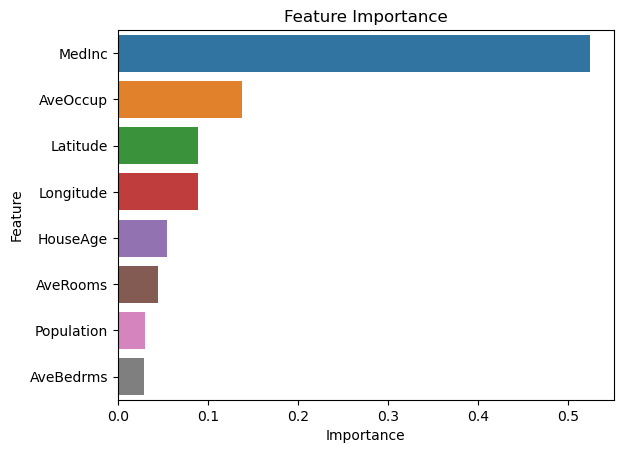

In [68]:
# Plot feature Importances
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df, hue = 'Feature')
plt.title('Feature Importance')
plt.show()

# XGB REGRESSOR / GRIDSEARCHCV

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
xgboost_model = XGBRegressor()

In [58]:
# Parameter Grid
param_grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.2],
    'max_depth' : [3, 5, 7],
    'subsample' : [0.8, 1.0],
    'colsample_bytree' : [0.8, 1.0]
}

In [60]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [61]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
